In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
rng = np.random.default_rng()

In [3]:
df = pd.read_csv('standings2.csv')
df = df.set_index("Team")
df

,Balancing,Halfpipe,Funnel Endurance,Newton's Cradle,Long Jump,5 Meter Hurdles,Block Pushing,Relay Run,Event 9,Event 10,Event 11,Event 12,Event 13,Event 14,Event 15,Event 16
Team,,,,,,,,,,,,,,,,
Minty Maniacs,25,15,25,10,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O'rangers,6,25,20,25,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crazy Cat's Eyes,11,20,10,12,25,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Raspberry Racers,20,7,7,15,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Midnight Wisps,15,12,5,11,5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team Galactic,1,11,2,20,9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Savage Speeders,2,1,15,7,12,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balls of Chaos,12,3,11,3,20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hazers,9,8,6,9,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
poss_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]

In [5]:
# ranks = pd.DataFrame(index = df.index)
# scores = pd.DataFrame(index = df.index)

ranks = pd.read_pickle("ranks.pkl")
scores = pd.read_pickle("scores.pkl") 

In [6]:
def fillDf(oldDf):
    filledDf = oldDf.copy()
    for col in oldDf.columns[oldDf.isna().any()]:
        rng.shuffle(poss_scores)
        filledDf[col] = poss_scores
    filledDf["sum"] = filledDf.sum(axis=1)
    filledDf["rank"] = filledDf["sum"].rank(ascending=False)
    return filledDf

In [7]:
# for i in range(100000):
#     if i % 200 == 0:
#         print(i)

#     scenario = fillDf(df)

#     scores[i] = scenario["sum"]
#     ranks[i] = scenario["rank"]

In [8]:
# ranks.to_pickle("ranks.pkl")
# scores.to_pickle("scores.pkl")

In [9]:
ranks

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Team,,,,,,,,,,,,,,,,,,,,,
Minty Maniacs,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,6.0,...,6.0,4.0,2.0,1.5,4.0,4.0,2.0,3.0,1.0,4.0
O'rangers,1.0,1.0,5.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,...,2.0,1.5,4.0,8.0,3.0,1.0,1.0,4.0,5.0,11.0
Crazy Cat's Eyes,9.0,3.0,1.0,4.0,6.0,3.0,1.0,4.0,3.0,1.0,...,1.0,1.5,3.0,1.5,1.0,3.0,4.0,1.0,4.0,1.0
Raspberry Racers,2.0,10.0,4.0,3.0,2.0,5.5,6.5,3.0,6.0,5.0,...,8.0,10.0,5.0,9.0,5.0,8.0,7.0,5.0,2.0,3.0
Midnight Wisps,6.0,5.0,8.0,7.0,9.0,7.0,8.0,6.0,4.0,9.0,...,4.0,3.0,7.5,4.0,8.0,2.0,6.0,6.0,7.0,2.0
Team Galactic,5.0,7.0,9.0,11.0,5.0,15.0,5.0,9.0,2.0,8.0,...,7.0,8.0,11.0,5.0,13.0,9.0,3.0,12.5,12.0,5.0
Savage Speeders,10.0,4.0,10.0,5.0,7.0,4.0,3.0,2.0,9.0,2.0,...,5.0,7.0,7.5,3.0,2.0,5.0,9.0,2.0,6.0,6.0
Balls of Chaos,8.0,16.0,11.0,16.0,8.0,9.0,14.0,11.5,7.0,11.0,...,11.0,6.0,12.0,13.0,6.0,6.0,13.0,15.0,11.0,7.0
Hazers,7.0,14.0,6.0,8.0,10.0,10.5,6.5,8.0,13.0,12.0,...,3.0,14.0,1.0,16.0,12.0,7.0,8.0,11.0,9.0,13.0


Minty Maniacs
O'rangers
Crazy Cat's Eyes
Raspberry Racers
Midnight Wisps
Team Galactic
Savage Speeders
Balls of Chaos
Hazers
Bumblebees
Team Momo
Green Ducks
Thunderbolts
Hornets
Oceanics
Mellow Yellow


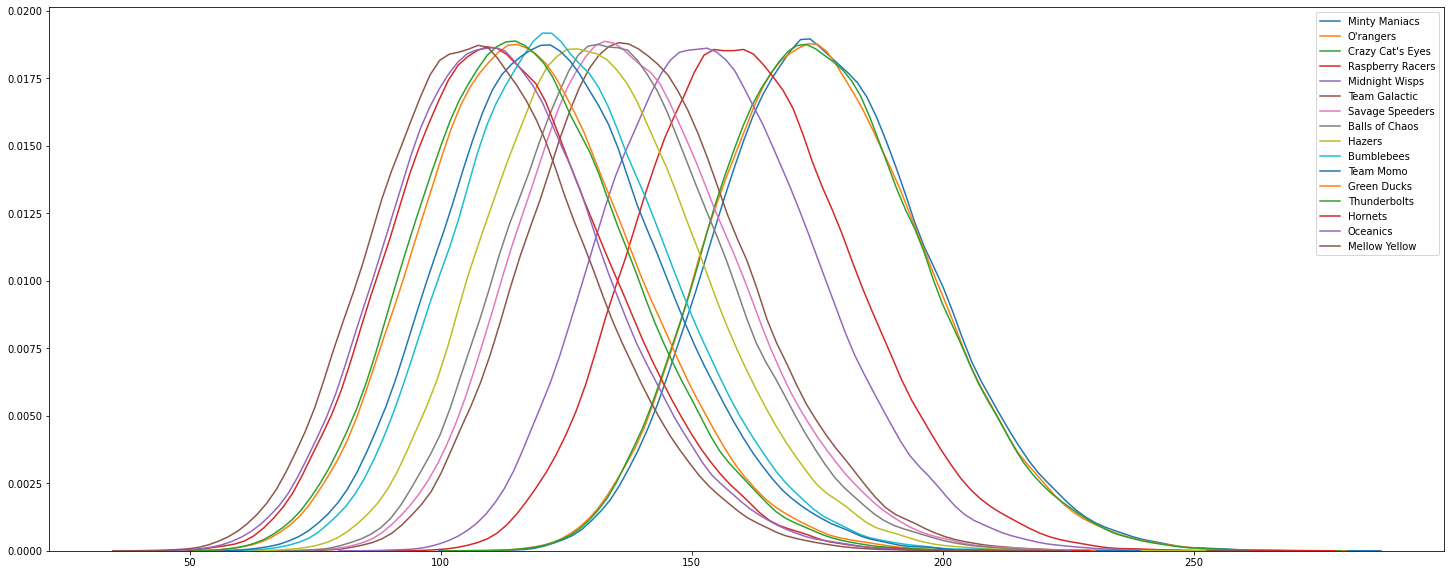

In [10]:
plt.figure(figsize=(25,10))
for idx, row in scores.iterrows():
    print(idx)
    sns.kdeplot(row, label = idx)
plt.legend()
plt.savefig("scores_hist.png")
plt.show()

Minty Maniacs
O'rangers
Crazy Cat's Eyes
Raspberry Racers
Midnight Wisps
Team Galactic
Savage Speeders
Balls of Chaos
Hazers
Bumblebees
Team Momo
Green Ducks
Thunderbolts
Hornets
Oceanics
Mellow Yellow


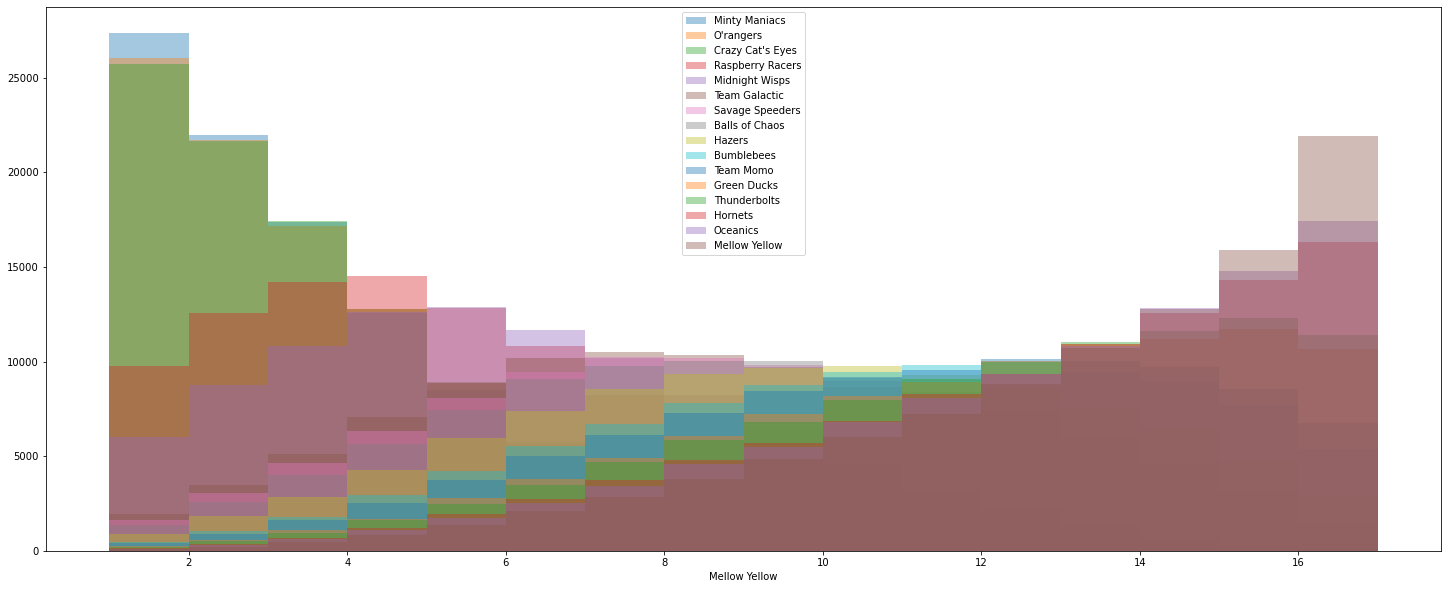

In [11]:
plt.figure(figsize=(25,10))
for idx, row in ranks.iterrows():
    print(idx)
    sns.distplot(row, label = idx, kde = False, bins = range(1,18))
plt.legend()
plt.savefig("ranks_hist.png")
plt.show()

In [12]:

# rankCounts = pd.DataFrame(df["Team"])
# rankCounts = rankCounts.set_index("Team")
# for i in range(1, 17):
#     print(i)
#     rankCounts[str(i)] = ranks[(i <= ranks) & (ranks < i+1)].count(axis = 1)
# rankCounts


In [13]:
# sns.set()
# plt.figure(figsize=(25,15))
# rankCounts2 = rankCounts2/500
# sns.heatmap(rankCounts2, annot = True)
# plt.show()

In [14]:
rankHeatmap = pd.DataFrame(index = df.index)
for idx, row in ranks.iterrows():
    counts = row.value_counts(normalize = True)
    for i in range(1, 17):
        rankHeatmap.loc[idx, i] = counts[(counts.index >= i) & (counts.index < i+1)].sum()
rankHeatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Team,,,,,,,,,,,,,,,,
Minty Maniacs,0.27364,0.21982,0.17390,0.12579,0.08489,0.05418,0.03127,0.01774,0.01014,0.00493,0.00238,0.00088,0.00034,0.00008,0.00002,0.00000
O'rangers,0.26072,0.21720,0.17192,0.12803,0.08874,0.05699,0.03504,0.02046,0.01112,0.00566,0.00248,0.00108,0.00038,0.00016,0.00002,0.00000
Crazy Cat's Eyes,0.25743,0.21646,0.17444,0.12764,0.08899,0.05729,0.03633,0.02067,0.01083,0.00590,0.00256,0.00095,0.00039,0.00010,0.00002,0.00000
Raspberry Racers,0.09791,0.12574,0.14190,0.14523,0.12859,0.10831,0.08231,0.06130,0.04226,0.02880,0.01784,0.01077,0.00563,0.00242,0.00086,0.00013
Midnight Wisps,0.06001,0.08781,0.10834,0.12596,0.12895,0.11687,0.10188,0.08215,0.06379,0.04654,0.03207,0.02221,0.01321,0.00662,0.00284,0.00075
Team Galactic,0.01943,0.03489,0.05099,0.07098,0.08851,0.10207,0.10492,0.10354,0.09701,0.08661,0.07167,0.06051,0.04538,0.03396,0.02067,0.00886
Savage Speeders,0.01636,0.03062,0.04628,0.06346,0.08050,0.09464,0.10256,0.10167,0.09818,0.08994,0.08018,0.06764,0.05216,0.03881,0.02519,0.01181
Balls of Chaos,0.01341,0.02589,0.03993,0.05656,0.07417,0.09075,0.09786,0.10052,0.10016,0.09115,0.08396,0.07431,0.05936,0.04573,0.03162,0.01462
Hazers,0.00876,0.01824,0.02864,0.04286,0.05977,0.07363,0.08543,0.09341,0.09653,0.09756,0.09287,0.08553,0.07614,0.06468,0.04759,0.02836


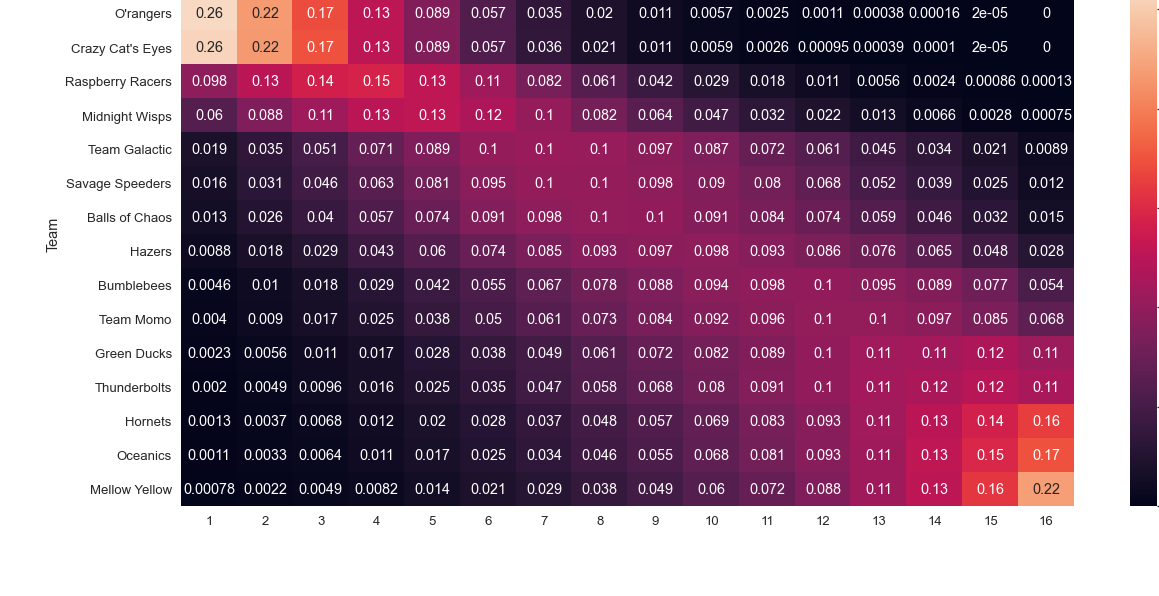

In [63]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.2)
plt.title("Heatmap of Placement Probabilities")
plt.xlabel("Rank")
sns.heatmap(rankHeatmap, annot = True)
plt.savefig("rankHeatmap.png", dpi = 200)
plt.show()

In [17]:
def fillDfFixed(oldDf, colsToLeave):
    filledDf = oldDf.copy()
    for col in oldDf.columns[colsToLeave:]:
        rng.shuffle(poss_scores)
        filledDf[col] = poss_scores
    filledDf["sum"] = filledDf.sum(axis=1)
    filledDf["rank"] = filledDf["sum"].rank(ascending=False)
    return filledDf

In [28]:
firstPlaceHistories = pd.DataFrame(index = df.index)
for eventsToIgnore in range(0, 7):
    ranks = pd.DataFrame(index = df.index)
    print(f"Keeping {eventsToIgnore} event(s)")

    for i in range(25000):
        if i % 200 == 0:
            print(i)
        scenario = fillDfFixed(df, eventsToIgnore)
        ranks[i] = scenario["rank"]
    
    for idx, row in ranks.iterrows():
        counts = row.value_counts(normalize = True)
        firstPlaceHistories.loc[idx, eventsToIgnore] = counts[counts.index < 2].sum()




Ignoring 0 event(s)
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
Ignoring 1 event(s)
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600


In [74]:
# print(colorDict)
colorDict = {
    'Minty Maniacs': "#429e9d",
    "O'rangers": "#FFA500",
    "Crazy Cat's Eyes": "green",
    'Raspberry Racers': "#e30b5d",
    'Midnight Wisps': "#02075d",
    'Team Galactic': "#7F00FF",
    'Savage Speeders': "#800000",
    'Balls of Chaos': "#cc7722",
    'Hazers': "grey",
    'Bumblebees': "#f1b82d",
    'Team Momo': "#1C004D",
    'Green Ducks': "#228c22",
    'Thunderbolts': "blue",
    'Hornets': "#9acd32",
    'Oceanics': "#265b5f",
    'Mellow Yellow': "#ffd300"
}

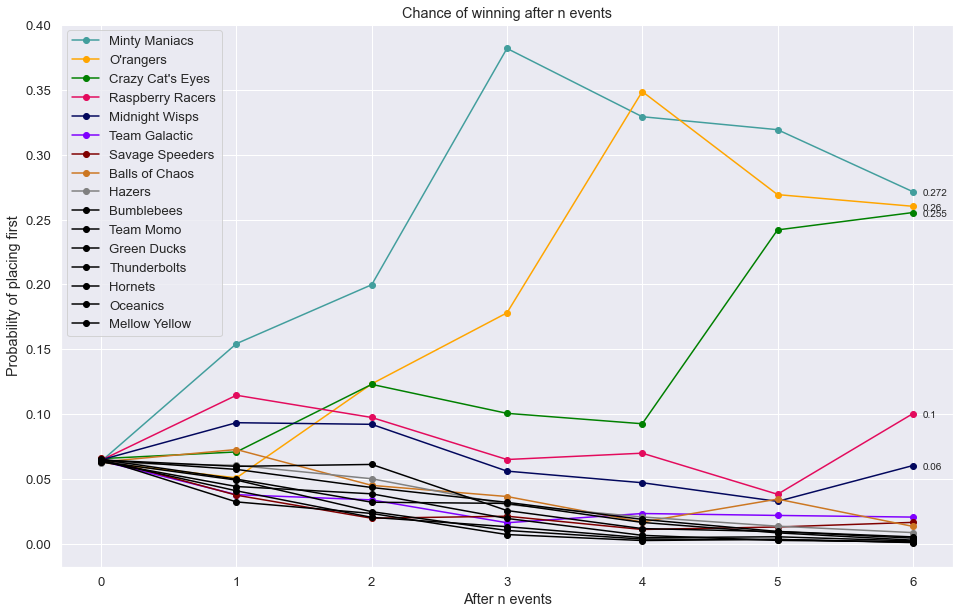

In [75]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1.2)
# colorDict = {}
for idx, row in firstPlaceHistories.iterrows():
    # colorDict[idx] = "#000000"
    plt.plot(range(7), row, label = idx, marker = 'o', color = colorDict[idx])
for idx, row in list(firstPlaceHistories.iterrows())[:5]:
    plt.annotate(round(row[6], 3), (6, row[6]), ha="left", textcoords="offset points", xytext=(10,-4), fontsize = 'x-small')
plt.title("Chance of winning after n events")
plt.ylabel("Probability of placing first")
plt.xlabel("After n events")
plt.legend()
plt.savefig("rankHistory.png", dpi = 200)
plt.show()